<a href="https://colab.research.google.com/github/rahulvenkat207/CBoWModel/blob/main/cbowtesr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the vocabulary
vocabulary = ['eat', 'apple', 'orange', 'sapota', 'banana']

# Define the given one-hot encoded vectors
one_hot_encoded = np.array([
    [1, 0, 0, 0, 0],  # eat
    [0, 1, 0, 0, 0],  # apple
    [0, 0, 1, 0, 0],  # orange
    [0, 0, 0, 1, 0],  # banana
    [0, 0, 0, 0, 1]   # sapota
])

np.random.seed(0)  # for reproducibility
weights_input_hidden = np.random.rand(len(vocabulary), 3)  # Assuming 3 hidden units

# Define the weights for hidden to output layer
weights_hidden_output = np.array([
    [0.1, 0.4, 0.2, 0.1, 0.1],
    [0.1, 0.2, 0.4, 0.1, 0.1],
    [0.2, 0.1, 0.4, 0.1, 0.1]
])




In [ ]:
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)


In [ ]:
# Custom loss function
def custom_loss(output_layer, target_index):
    predicted_probability = output_layer[np.arange(len(output_layer)), target_index]
    loss = -np.log(predicted_probability + 1e-9)  # Adding a small value to avoid division by zero
    return loss

In [ ]:


# Function to compute predictions, error, and update weights
def compute_error_and_update_weights(context_word_vector, target_index, weights_input_hidden, weights_hidden_output, learning_rate):
    # Compute hidden layer
    hidden_layer = np.dot(context_word_vector, weights_input_hidden)

    # Compute output layer
    output_layer = np.dot(hidden_layer, weights_hidden_output)

    # Compute softmax predictions
    softmax_predictions = softmax(output_layer)

    # Compute error
    error = softmax_predictions - np.eye(weights_hidden_output.shape[1])[target_index]

    # Update weights_hidden_output
    weights_hidden_output -= learning_rate * np.outer(hidden_layer.flatten(), error.flatten())

    # Update weights_input_hidden
    weights_input_hidden -= learning_rate * np.dot(context_word_vector.T, np.dot(error, weights_hidden_output.T))

    return softmax_predictions, error

Output (yj)                   Error                         
p(eat|eat) 0.003708090180055599      0.003708090180055599     
p(apple|eat) 0.24894021500476937       0.24894021500476937      
p(orange|eat) 0.24920572639091626       0.24920572639091626      
p(sapota|eat) 0.24866412563605983       -0.7513358743639402      
p(banana|eat) 0.24948184278819902       0.24948184278819902      
Weights from Input to Hidden Layer:
Word eat: [1.14111809 1.41664763 1.03247283]
Word apple: [0.54488318 0.4236548  0.64589411]
Word orange: [0.43758721 0.891773   0.96366276]
Word sapota: [0.38344152 0.79172504 0.52889492]
Word banana: [0.56804456 0.92559664 0.07103606]

Weights from Hidden to Output Layer:
Word        eat            apple     orange    banana    sapota    
-0.7132493117690543 0.5641538659084753 0.2744487780303485 0.3873885047995865 0.38725816303062477
-0.9213081763011941 0.40674030542596856 0.4902441309811046 0.4623723491604069 0.4619513907336988
-0.5816113581934127 0.2577234172221794 0.

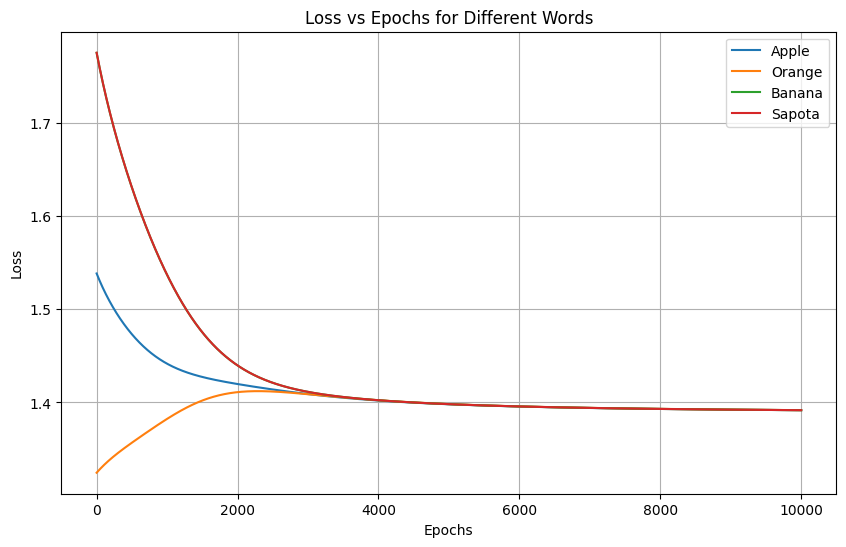

Loss list for all fruits:
Apple: [array([1.53832179]), array([1.53813139]), array([1.53794137]), array([1.53775173]), array([1.53756248]), array([1.5373736]), array([1.5371851]), array([1.53699697]), array([1.53680922]), array([1.53662184]), array([1.53643483]), array([1.53624819]), array([1.53606192]), array([1.53587601]), array([1.53569047]), array([1.5355053]), array([1.53532048]), array([1.53513603]), array([1.53495194]), array([1.5347682]), array([1.53458483]), array([1.5344018]), array([1.53421913]), array([1.53403682]), array([1.53385485]), array([1.53367324]), array([1.53349197]), array([1.53331105]), array([1.53313048]), array([1.53295025]), array([1.53277037]), array([1.53259083]), array([1.53241163]), array([1.53223277]), array([1.53205424]), array([1.53187606]), array([1.53169821]), array([1.53152069]), array([1.53134351]), array([1.53116666]), array([1.53099014]), array([1.53081395]), array([1.53063809]), array([1.53046256]), array([1.53028735]), array([1.53011246]), array

In [ ]:
# Define learning rate
learning_rate = 0.001

# Define the training dataset (corpus)
training_data = [
    ('eat', 'apple'),
    ('eat', 'orange'),
    ('eat', 'banana'),
    ('eat', 'sapota')
] * 1

# Define the number of epochs
num_epochs = 10000

# Initialize lists to store losses for each word
apple_loss_list = []
orange_loss_list = []
banana_loss_list = []
sapota_loss_list = []

# Iterate over the training dataset
for epoch in range(num_epochs):
    for context_word, target_word in training_data:
        context_index = vocabulary.index(context_word)
        target_index = vocabulary.index(target_word)
        context_word_vector = one_hot_encoded[context_index].reshape(1, -1)

        # Compute predictions, error, and update weights
        predictions, error = compute_error_and_update_weights(context_word_vector, target_index, weights_input_hidden, weights_hidden_output, learning_rate)

        # Compute custom loss for each word
        if target_word == 'apple':
            apple_loss_list.append(custom_loss(predictions, target_index))
        elif target_word == 'orange':
            orange_loss_list.append(custom_loss(predictions, target_index))
        elif target_word == 'banana':
            banana_loss = custom_loss(predictions, target_index)
            if banana_loss is not None:
                banana_loss_list.append(banana_loss)
            else:
                banana_loss_list.append(np.nan)  # Fill with NaN if no loss recorded for 'banana'
        elif target_word == 'sapota':
            sapota_loss_list.append(custom_loss(predictions, target_index))

# Print the final predictions along with error
print(f"{'Output (yj)':<30}{'Error':<30}")
for word, prediction, err in zip(vocabulary, predictions[0], error[0]):  # Start from index 0 to include the first row
    print(f"p({word}|{training_data[0][0]}) {prediction:<25} {err:<25}")

# Print the learned weights from input to hidden layer
print("Weights from Input to Hidden Layer:")
for i, embedding_vector in enumerate(weights_input_hidden):
    print(f"Word {vocabulary[i]}: {embedding_vector}")

print("\nWeights from Hidden to Output Layer:")
print(f"{'Word':<12}{'eat':<15}{'apple':<10}{'orange':<10}{'banana':<10}{'sapota':<10}")
for output_vector in weights_hidden_output:
    print(" ".join([str(value) for value in output_vector]))

# Plotting the losses
plt.figure(figsize=(10, 6))
plt.plot(apple_loss_list, label='Apple')
plt.plot(orange_loss_list, label='Orange')
plt.plot(banana_loss_list, label='Banana')
plt.plot(sapota_loss_list, label='Sapota')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for Different Words')
plt.legend()
plt.grid(True)
plt.show()
# Print the loss list for all fruits
print("Loss list for all fruits:")
print("Apple:", apple_loss_list)
print("Orange:", orange_loss_list)
print("Banana:", banana_loss_list)
print("Sapota:", sapota_loss_list)



In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Define the vocabulary
vocabulary = ['eat', 'apple', 'orange', 'banana', 'sapota']

# Define the weights for hidden to output layer
weights_hidden_output = np.array([
[-0.7132493117690543, 0.5641538659084753, 0.2744487780303485, 0.3873885047995865, 0.38725816303062477],
[-0.9213081763011941, 0.40674030542596856, 0.4902441309811046, 0.4623723491604069, 0.4619513907336988],
[-0.5816113581934127, 0.2577234172221794, 0.4643769576134463, 0.3799252112949343, 0.3795857720628527]
])

# Transpose the weights to align samples along rows
weights_hidden_output = weights_hidden_output.T

# Calculate cosine similarity for all pairs
similarity_matrix = cosine_similarity(weights_hidden_output)

# Display the similarity matrix
print("Cosine Similarity Matrix:")
for i, word1 in enumerate(vocabulary):
    for j, word2 in enumerate(vocabulary):
        print(f"{word1}-{word2}: {similarity_matrix[i][j]}")


Cosine Similarity Matrix:
eat-eat: 0.9999999999999998
eat-apple: -0.9597641273715996
eat-orange: -0.9665998108762378
eat-banana: -0.9945316148797846
eat-sapota: -0.9945330958571473
apple-eat: -0.9597641273715996
apple-apple: 1.0
apple-orange: 0.8765862882389347
apple-banana: 0.9541906332936849
apple-sapota: 0.954264707761
orange-eat: -0.9665998108762378
orange-apple: 0.8765862882389347
orange-orange: 0.9999999999999999
orange-banana: 0.9803632938164684
orange-sapota: 0.9803155384525991
banana-eat: -0.9945316148797846
banana-apple: 0.9541906332936849
banana-orange: 0.9803632938164684
banana-banana: 1.0
banana-sapota: 0.9999999664617331
sapota-eat: -0.9945330958571473
sapota-apple: 0.954264707761
sapota-orange: 0.9803155384525991
sapota-banana: 0.9999999664617331
sapota-sapota: 1.0
